In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK downloads
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adedi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adedi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adedi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load the dataset
df = pd.read_excel("cleaned_reviews.xlsx") 
df.head()

,brand,model,price,Ratings,processed_reviews,Sentiment
0,Hey Dude,Wally Linen Natural,$64.99,5,bought son love wear almost everi day definit ...,Positive
1,Hey Dude,Wally Linen Natural,$64.99,5,get lot compliment,Positive
2,Hey Dude,Wally Linen Natural,$64.99,5,love dude,Positive
3,Hey Dude,Wally Linen Natural,$64.99,5,love,Positive
4,Hey Dude,Wally Linen Natural,$64.99,5,probabl favorit,Positive


In [16]:
print("\nRating Distribution:")
rating_counts = df['Ratings'].value_counts().sort_index()
print(rating_counts)



Rating Distribution:
Ratings
1     183
2     181
3     215
4     254
5    2126
Name: count, dtype: int64


Accuracy: 0.7989864864864865
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        80
     Neutral       0.00      0.00      0.00        39
    Positive       0.80      1.00      0.89       473

    accuracy                           0.80       592
   macro avg       0.27      0.33      0.30       592
weighted avg       0.64      0.80      0.71       592



C:\Users\adedi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adedi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adedi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

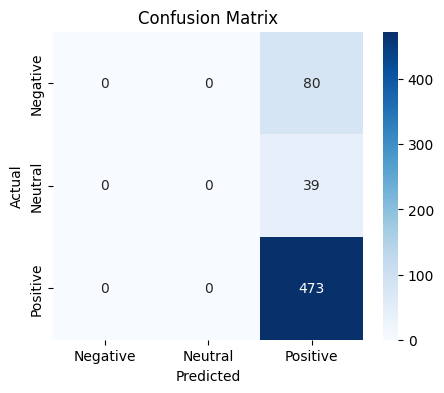

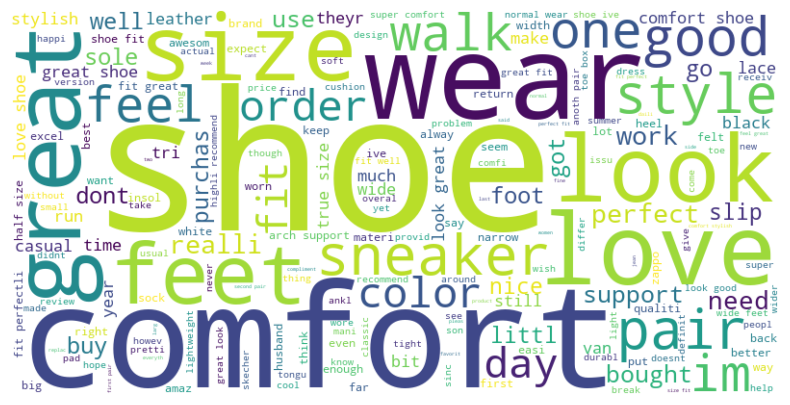

In [7]:



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['processed_reviews'], df['Sentiment'], test_size=0.2, random_state=42)

# Convert text to numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Word Cloud for Positive Sentiment
positive_words = ' '.join(df.loc[df['Sentiment'] == 'Positive', 'processed_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



LSTM

In [20]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

Epoch 1/10


C:\Users\adedi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.7869 - loss: 0.7431 - val_accuracy: 0.8041 - val_loss: 0.6277
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.7961 - loss: 0.6599 - val_accuracy: 0.8041 - val_loss: 0.6240
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.8062 - loss: 0.6385 - val_accuracy: 0.8041 - val_loss: 0.6243
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.8020 - loss: 0.6380 - val_accuracy: 0.8041 - val_loss: 0.6277
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.7952 - loss: 0.6572 - val_accuracy: 0.8041 - val_loss: 0.6243
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.7855 - loss: 0.6837 - val_accuracy: 0.7990 - val_loss: 0.6354
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.8017 - loss: 0.6429 - val_accuracy: 0.8057 - val_loss: 0.6258
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.8107 - loss: 0.6187 - val_accuracy: 0.7990 - 

C:\Users\adedi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adedi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adedi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

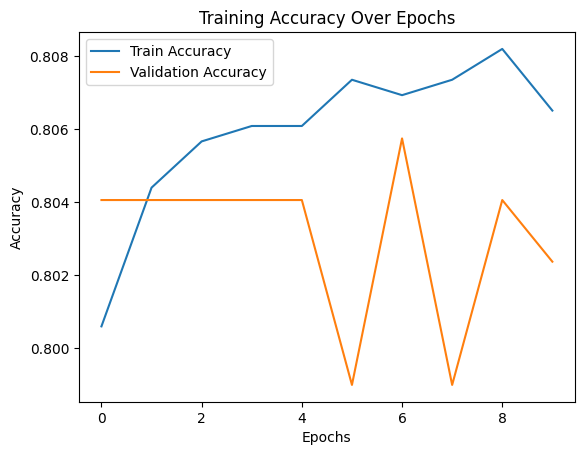

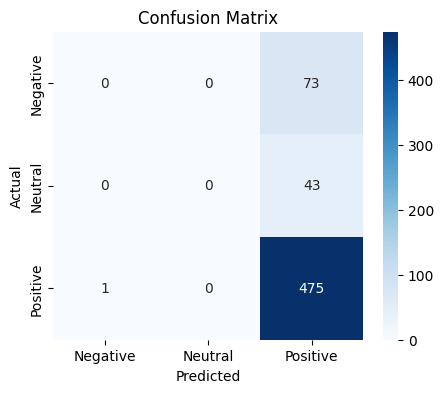

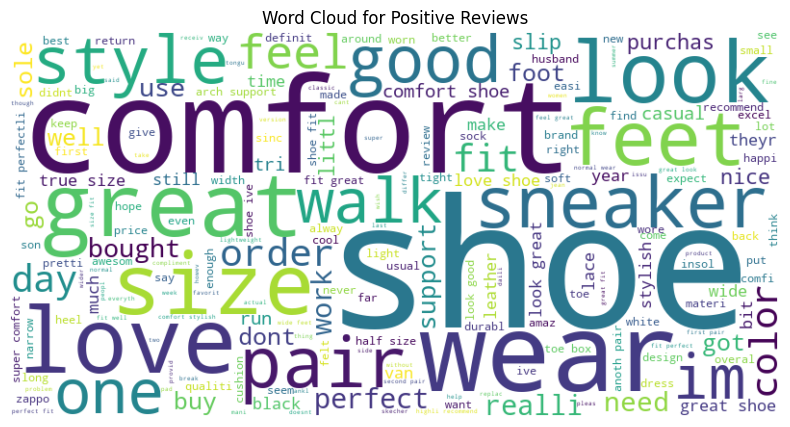

In [15]:
# Ensure sentiment values are numerical
sentiment_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['processed_reviews'], df['Sentiment'], test_size=0.2, stratify=df['Sentiment'], random_state=42)

# Tokenization and Padding
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len, padding='post')

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Build LSTM Model
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model using cleaned data
history = model.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), epochs=10, batch_size=32)

# Evaluate model
y_pred = np.argmax(model.predict(X_test_seq), axis=1)
y_true = np.argmax(y_test, axis=1)
print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy Over Epochs')
plt.show()

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Word Cloud for Positive Sentiment
positive_words = ' '.join(df[df['Sentiment'] == 2]['processed_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()


Epoch 1/10


C:\Users\adedi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 161ms/step - accuracy: 0.3412 - loss: 2.3066 - val_accuracy: 0.0709 - val_loss: 2.6276
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 157ms/step - accuracy: 0.4299 - loss: 1.8975 - val_accuracy: 0.0912 - val_loss: 2.9121
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 150ms/step - accuracy: 0.5335 - loss: 1.6554 - val_accuracy: 0.2095 - val_loss: 2.2697
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 193ms/step - accuracy: 0.6268 - loss: 1.4254 - val_accuracy: 0.2517 - val_loss: 2.4751
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 33s 184ms/step - accuracy: 0.7164 - loss: 1.1742 - val_accuracy: 0.2534 - val_loss: 2.8566
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 157ms/step - accuracy: 0.7647 - loss: 1.0006 - val_accuracy: 0.3024 - val_loss: 2.7129
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 37s 206ms/step - accuracy: 0.7874 - loss: 0.8924 - val_accuracy: 0.3463 - val_loss: 2.6966
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 194ms/step - accuracy: 0.8325 - loss: 0.7614 - val

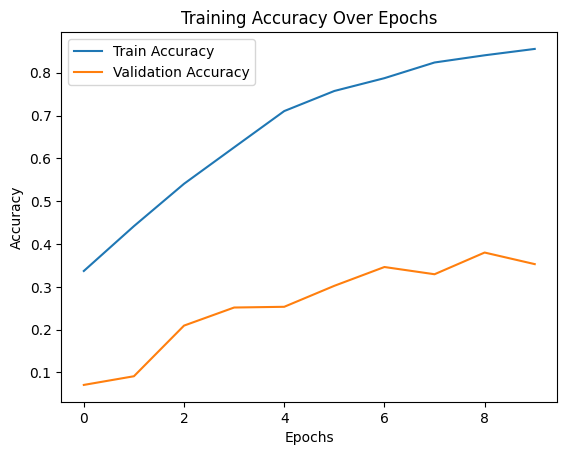

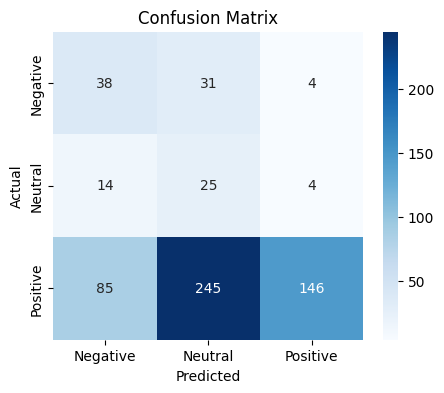

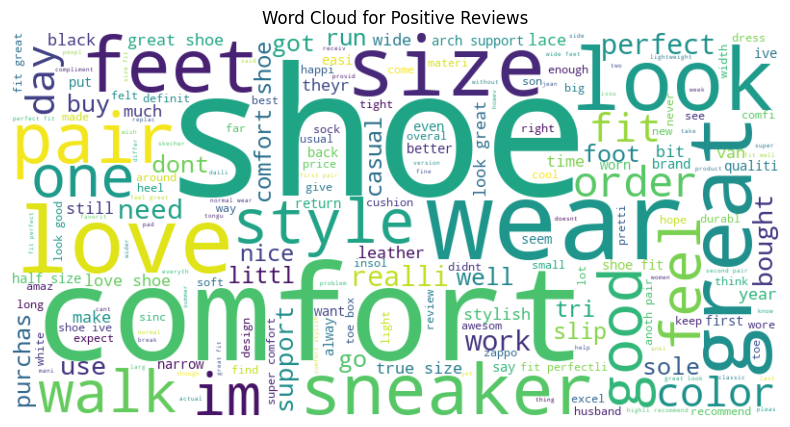

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['processed_reviews'], df['Sentiment'], test_size=0.2, stratify=df['Sentiment'], random_state=42)

# Tokenization and Padding
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len, padding='post')

# Resampling with SMOTE
smote = SMOTE()
X_train_seq_resampled, y_train_resampled = smote.fit_resample(X_train_seq, y_train)

# Convert labels to categorical
y_train_resampled = to_categorical(y_train_resampled, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(df['Sentiment']), y=df['Sentiment'])
class_weights = dict(enumerate(class_weights))

# Build LSTM Model
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model using cleaned and balanced data
history = model.fit(X_train_seq_resampled, y_train_resampled, validation_data=(X_test_seq, y_test), epochs=10, batch_size=32, class_weight=class_weights)

# Evaluate model
y_pred = np.argmax(model.predict(X_test_seq), axis=1)
y_true = np.argmax(y_test, axis=1)
print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy Over Epochs')
plt.show()

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Word Cloud for Positive Sentiment
positive_words = ' '.join(df[df['Sentiment'] == 2]['processed_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()


Class distribution before balancing:
Sentiment
2    0.804326
0    0.123015
1    0.072660
Name: proportion, dtype: float64
Class weights: {0: 2.711340206185567, 1: 4.587209302325581, 2: 0.41439075630252103}


C:\Users\adedi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 96s 488ms/step - accuracy: 0.3499 - loss: 2.2255 - val_accuracy: 0.0811 - val_loss: 2.3660 - learning_rate: 0.0010
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 87s 486ms/step - accuracy: 0.4406 - loss: 1.8690 - val_accuracy: 0.1706 - val_loss: 2.2712 - learning_rate: 0.0010
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 92s 516ms/step - accuracy: 0.5873 - loss: 1.5625 - val_accuracy: 0.2838 - val_loss: 2.2232 - learning_rate: 9.0000e-04
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 86s 478ms/step - accuracy: 0.7020 - loss: 1.2160 - val_accuracy: 0.2753 - val_loss: 2.4322 - learning_rate: 8.1000e-04
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 89s 497ms/step - accuracy: 0.7569 - loss: 0.9380 - val_accuracy: 0.3716 - val_loss: 2.1046 - learning_rate: 7.2900e-04
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 499ms/step - accuracy: 0.7998 - loss: 0.7796 - val_accuracy: 0.3378 - val_loss: 2.6744 - learning_rate: 6.5610e-04
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 95s 525ms/ste

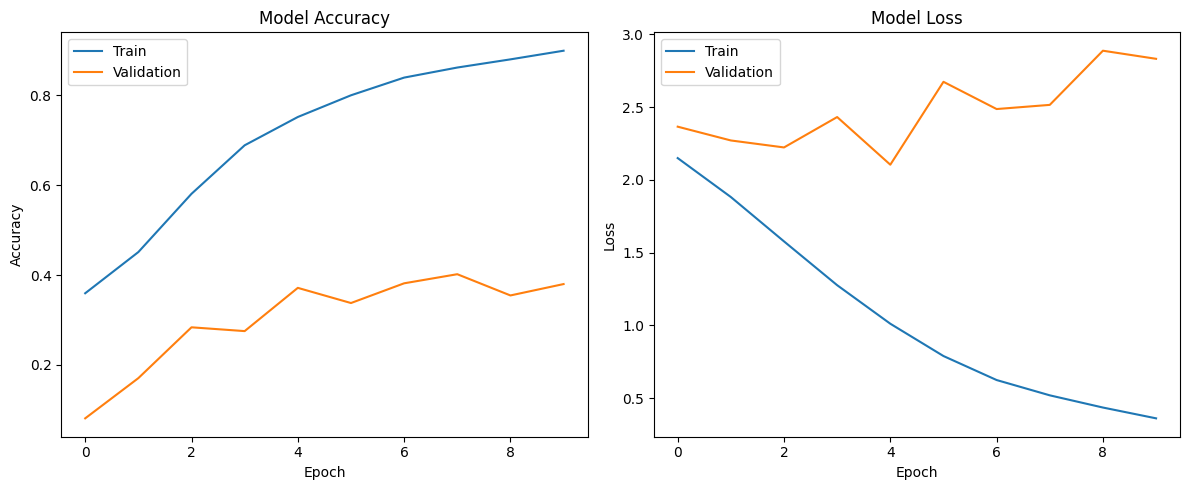

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step

Final Evaluation Results:
Accuracy: 0.3716216216216216

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.34      0.26        73
           1       0.09      0.63      0.16        43
           2       0.93      0.35      0.51       476

    accuracy                           0.37       592
   macro avg       0.41      0.44      0.31       592
weighted avg       0.78      0.37      0.46       592



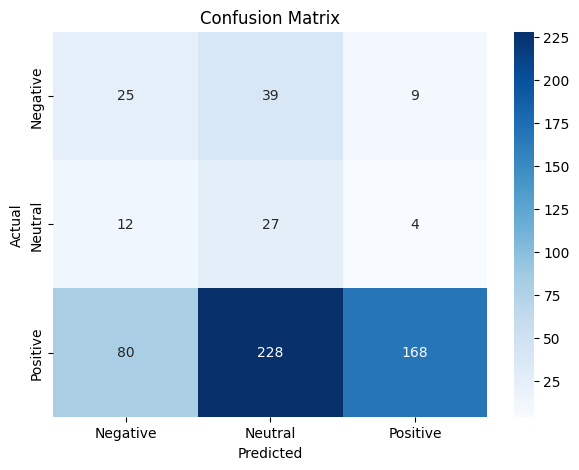

In [ ]:
# Print class distribution
print("Class distribution before balancing:")
print(df['Sentiment'].value_counts(normalize=True))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_reviews'], 
    df['Sentiment'], 
    test_size=0.2, 
    random_state=42,
    stratify=df['Sentiment']  # Ensure balanced split
)

# Tokenization with increased vocabulary size
max_words = 10000  # Increased from 5000
max_len = 150  # Increased from 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len, padding='post')

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_seq, y_train)

# Compute class weights correctly
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weight_dict)

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 2:
        return lr
    else:
        return lr * 0.9  # Decay learning rate by 10% after epoch 2

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Build Bidirectional LSTM Model
model = Sequential([
    Embedding(max_words, 200, input_length=max_len),  # Increased embedding dimensions
    Bidirectional(LSTM(128, return_sequences=True)),  # Bidirectional & increased units
    Dropout(0.3),  # Increased dropout
    Bidirectional(LSTM(64)),  # Second bidirectional layer
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 classes: Negative (0), Neutral (1), Positive (2)
])

# Compile model with appropriate loss function
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train model with balanced dataset, class weights, and callbacks
history = model.fit(
    X_train_resampled, 
    y_train_resampled, 
    validation_data=(X_test_seq, y_test), 
    epochs=20,  # Increased max epochs
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[
        early_stopping,
        LearningRateScheduler(lr_scheduler)
    ],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Evaluate model
y_pred = np.argmax(model.predict(X_test_seq), axis=1)
print("\nFinal Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=['Negative', 'Neutral', 'Positive'], 
    yticklabels=['Negative', 'Neutral', 'Positive']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Class weights: {0: 2.711340206185567, 1: 4.587209302325581, 2: 0.41439075630252103}


C:\Users\adedi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 124ms/step - accuracy: 0.3487 - loss: 2.7756 - val_accuracy: 0.0726 - val_loss: 2.5462 - learning_rate: 0.0010
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 116ms/step - accuracy: 0.3371 - loss: 2.2777 - val_accuracy: 0.0777 - val_loss: 2.2150 - learning_rate: 0.0010
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - accuracy: 0.3523 - loss: 2.1656 - val_accuracy: 0.0726 - val_loss: 2.2187 - learning_rate: 0.0010
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 0.3541 - loss: 2.1052 - val_accuracy: 0.1132 - val_loss: 1.9409 - learning_rate: 0.0010
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 106ms/step - accuracy: 0.3681 - loss: 2.0774 - val_accuracy: 0.0929 - val_loss: 2.1141 - learning_rate: 0.0010
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 22s 116ms/step - accuracy: 0.3899 - loss: 2.0347 - val_accuracy: 0.1402 - val_loss: 2.0657 - learning_rate: 0.0010
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - accuracy: 0.4

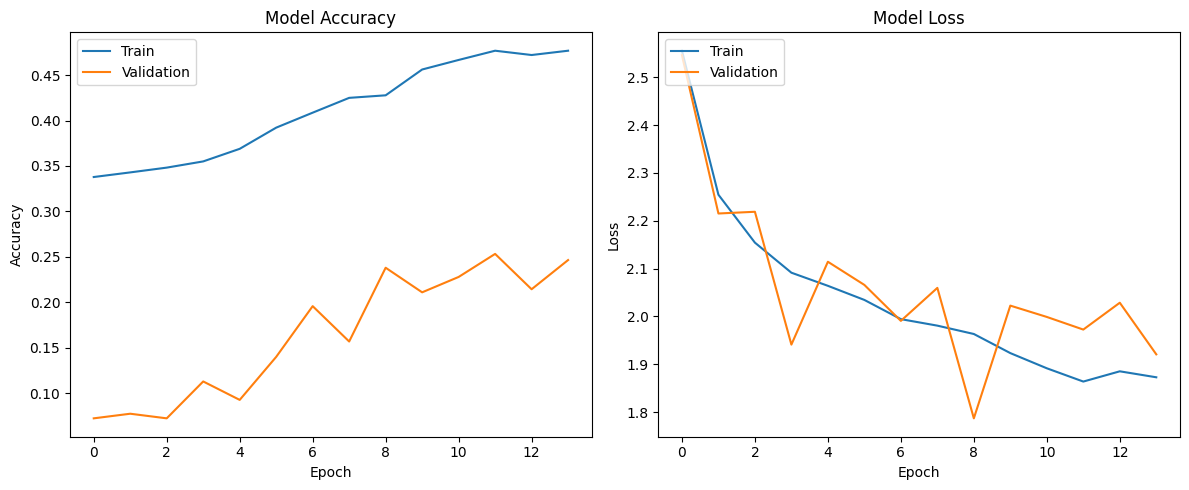

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step

Final Evaluation Results:
Accuracy: 0.23817567567567569

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.25      0.23        73
           1       0.08      0.72      0.14        43
           2       0.92      0.19      0.32       476

    accuracy                           0.24       592
   macro avg       0.40      0.39      0.23       592
weighted avg       0.77      0.24      0.30       592



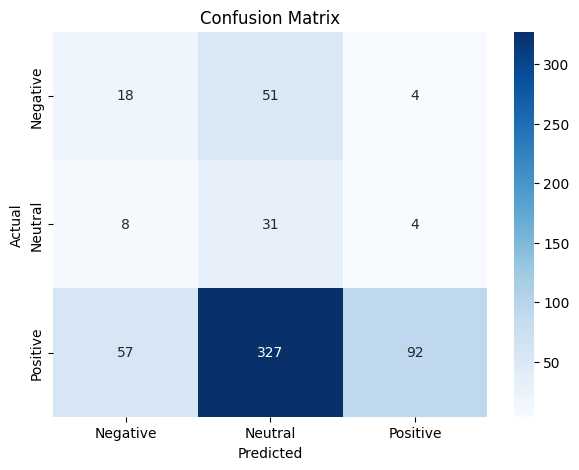

In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns

# Load GloVe embeddings
def load_glove_embeddings(glove_path):
    embeddings_index = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_path = 'glove.6B.200d.txt'  # Path to GloVe file
embeddings_index = load_glove_embeddings(glove_path)

# Create embedding matrix
def create_embedding_matrix(tokenizer, embeddings_index, max_words, embedding_dim):
    embedding_matrix = np.zeros((max_words, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix

# Load and preprocess data
# Assuming df is your DataFrame with 'processed_reviews' and 'Sentiment' columns
max_words = 10000
max_len = 150
embedding_dim = 200

# Tokenization
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['processed_reviews'])
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len, padding='post')

# Create embedding matrix
embedding_matrix = create_embedding_matrix(tokenizer, embeddings_index, max_words, embedding_dim)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_seq, y_train)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weight_dict)

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9  # Gradual decay after epoch 10

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Build Bidirectional LSTM Model
model = Sequential([
    Embedding(
        input_dim=max_words,
        output_dim=embedding_dim,
        input_length=max_len,
        weights=[embedding_matrix],
        trainable=False  # Freeze GloVe embeddings
    ),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes: Negative (0), Neutral (1), Positive (2)
])

# Compile model with standard loss function
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train model
history = model.fit(
    X_train_resampled,
    y_train_resampled,
    validation_data=(X_test_seq, y_test),
    epochs=20,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, LearningRateScheduler(lr_scheduler)],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Evaluate model
y_pred = np.argmax(model.predict(X_test_seq), axis=1)
print("\nFinal Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Negative', 'Neutral', 'Positive'],
    yticklabels=['Negative', 'Neutral', 'Positive']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [44]:
!pip install transformers datasets

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   --------------- ------------------------ 10.0/25.3 MB 47.8 MB/s eta 0:00:01
   ------------------------------- -------- 20.2/25.3 MB 49.0 MB/s eta 0:00:01
   ---------------------------------------- 25.3/25.3 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.1
    Uninstalling pyarrow-14.0.1:
      Successfully uninstalled pyarrow-14.0.1
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.2.0
    Uninstalling fsspec-2025.2.0:
      Successfully uninstalled f

  You can safely remove it manually.


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3

148/148 [==============================] - 2881s 19s/step - loss: 0.5860 - accuracy: 0.8010 - val_loss: 0.5082 - val_accuracy: 0.8041
Epoch 2/3
148/148 [==============================] - 3098s 21s/step - loss: 0.4330 - accuracy: 0.8382 - val_loss: 0.4627 - val_accuracy: 0.8277
Epoch 3/3
148/148 [==============================] - 3634s 25s/step - loss: 0.3092 - accuracy: 0.8821 - val_loss: 0.4255 - val_accuracy: 0.8429


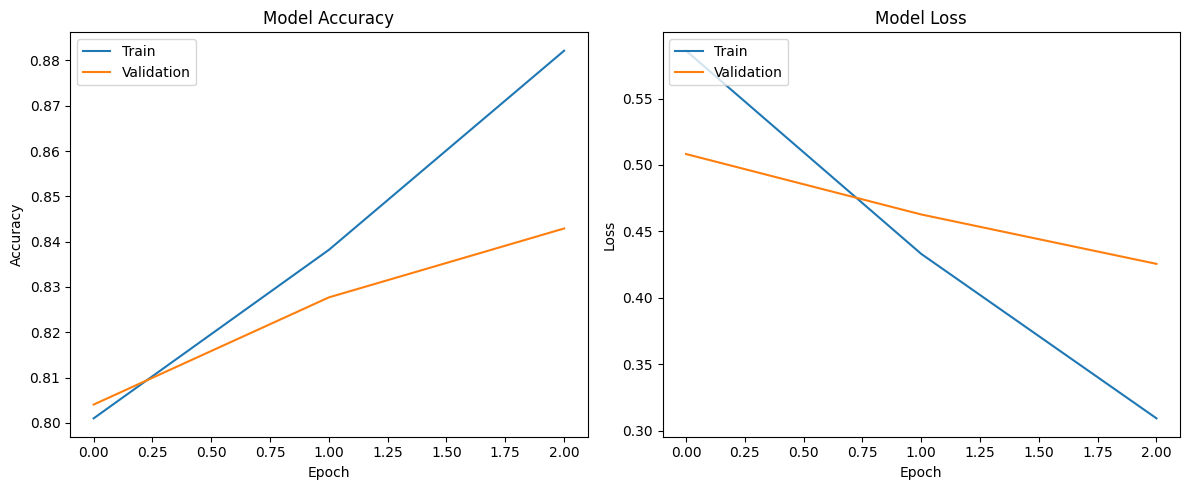

1/1 [==============================] - 5s 5s/step

Final Evaluation Results:
Accuracy: 0.8429054054054054

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.75      0.62        73
           1       0.29      0.12      0.17        43
           2       0.93      0.92      0.93       476

    accuracy                           0.84       592
   macro avg       0.59      0.60      0.57       592
weighted avg       0.84      0.84      0.83       592



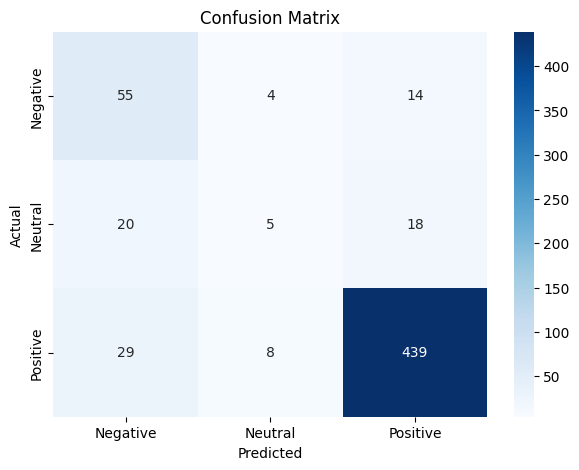

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import tensorflow as tf

# Load your dataset
# Assuming df is your DataFrame with 'processed_reviews' and 'Sentiment' columns
# Example:
# df = pd.read_csv('your_dataset.csv')

# Map sentiment labels to integers
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['Sentiment'] = df['Sentiment'].map(label_map)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_reviews'], 
    df['Sentiment'], 
    test_size=0.2, 
    random_state=42,
    stratify=df['Sentiment']  # Ensure balanced split
)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
def encode_examples(texts, labels, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='tf'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return tf.data.Dataset.from_tensor_slices((
        {'input_ids': tf.concat(input_ids, axis=0), 'attention_mask': tf.concat(attention_masks, axis=0)},
        labels
    ))

# Convert data to TensorFlow datasets
train_data = encode_examples(X_train.tolist(), y_train.tolist())
test_data = encode_examples(X_test.tolist(), y_test.tolist())

# Batch and shuffle the data
batch_size = 16
train_dataset = train_data.shuffle(len(X_train)).batch(batch_size)
test_dataset = test_data.batch(batch_size)

# Load pre-trained BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model
epochs = 3
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=epochs
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Evaluate the model
y_pred = []
for batch in test_dataset:
    logits = model.predict(batch[0])['logits']
    predictions = np.argmax(logits, axis=-1)
    y_pred.extend(predictions)

# Flatten y_test for comparison
y_test_flat = np.concatenate([y for x, y in test_dataset], axis=0)

# Print evaluation results
print("\nFinal Evaluation Results:")
print("Accuracy:", accuracy_score(y_test_flat, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_flat, y_pred))

# Confusion matrix
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test_flat, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Negative', 'Neutral', 'Positive'],
    yticklabels=['Negative', 'Neutral', 'Positive']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [5]:
# Save the model
model_save_path = './saved_bert_model'
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)
print(f"Model saved to {model_save_path}")

# To demonstrate how to load the model back
loaded_model = TFBertForSequenceClassification.from_pretrained(model_save_path)
loaded_tokenizer = BertTokenizer.from_pretrained(model_save_path)
print("Model and tokenizer loaded successfully!")

# Optional: Save the label mapping for future reference
import json
with open(f"{model_save_path}/label_map.json", 'w') as f:
    json.dump({v: k for k, v in label_map.items()}, f)  # Save inverted map for prediction
print("Label mapping saved")

Model saved to ./saved_bert_model


Some layers from the model checkpoint at ./saved_bert_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at ./saved_bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Model and tokenizer loaded successfully!
Label mapping saved


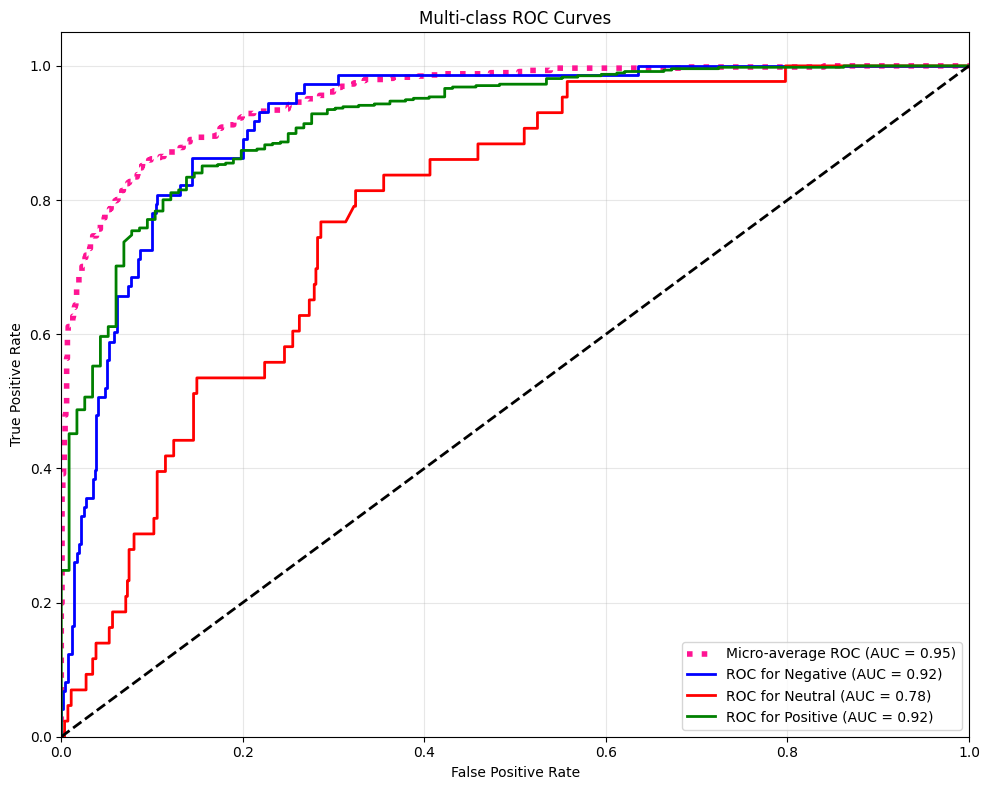

AUC for each class:
Negative: 0.9226
Neutral: 0.7832
Positive: 0.9201
Micro-average AUC: 0.9533


In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

# Get prediction probabilities from the model
y_pred_probs = []
y_test_all = []

for batch in test_dataset:
    logits = model(batch[0])['logits']
    probs = tf.nn.softmax(logits, axis=-1).numpy()
    y_pred_probs.extend(probs)
    y_test_all.extend(batch[1].numpy())

y_pred_probs = np.array(y_pred_probs)
y_test_all = np.array(y_test_all)

# Binarize the labels for multi-class ROC
n_classes = 3  # Negative, Neutral, Positive
y_test_bin = label_binarize(y_test_all, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = cycle(['blue', 'red', 'green'])
labels = ['Negative', 'Neutral', 'Positive']

for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC for {label} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_auc_curves.png')
plt.show()

# Print AUC values
print("AUC for each class:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.4f}")
print(f"Micro-average AUC: {roc_auc['micro']:.4f}")

In [ ]:
#loading later
loaded_model = TFBertForSequenceClassification.from_pretrained('./saved_bert_model')
loaded_tokenizer = BertTokenizer.from_pretrained('./saved_bert_model')

# Load the label mapping if needed
with open('./saved_bert_model/label_map.json', 'r') as f:
    id_to_label = json.load(f)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2954   NaN
2955   NaN
2956   NaN
2957   NaN
2958   NaN
Name: Sentiment, Length: 2959, dtype: float64
